# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Loading Data

In [2]:
greeks = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/greeks.csv")
train = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
test = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv")

# Greeks

In [3]:
greeks.head()

Id Alpha Beta Gamma Delta    Epsilon
0  000ff2bfdfe9     B    C     G     D  3/19/2019
1  007255e47698     A    C     M     B    Unknown
2  013f2bd269f5     A    C     M     B    Unknown
3  043ac50845d5     A    C     M     B    Unknown
4  044fb8a146ec     D    B     F     B  3/25/2020

In [4]:
greeks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       617 non-null    object
 1   Alpha    617 non-null    object
 2   Beta     617 non-null    object
 3   Gamma    617 non-null    object
 4   Delta    617 non-null    object
 5   Epsilon  617 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


# Main Dataset

## Preliminary Data Analysis

In [5]:
train.head()

Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC  ...        FL        FR  \
0  0.699861  0.025578   9.812214    5.555634  ...  7.298162   1.73855   
1  3.632190  0.025578  13.517790    1.229900  ...  0.173229   0.49706   
2  6.732840  0.025578  12.824570    1.229900  ...  7.709560   0.97556   
3  3.685344  0.025578  11.053708    1.229900  ...  6.122162   0.49706   
4  3.942255  0.054810   3.396778  102.151980  ...  8.153058  48.50134   

         FS         GB          GE            GF         GH         GI  \
0  0.094822  11.339138   72.611063   2003.810319  22.136229  69.834944   
1  0.568932   9.292698   72.611063  27981.562750  29.135430  32.131996   
2  1.198821  37.077772   88.609437  13676.957810  28.022851  35.192676   
3  0.284466  18.529584   82.416803   2094.262452  39.948656  90.493248   
4  0.121914  16.408728  146.109943   8524.370502  45.381316  36.262628   

          GL  Class  
0   0.120343      1  
1  21.978000      0  
2   0.196941      0  
3   0.155829      0  
4   0.096614      1  

[5 rows x 58 columns]

In [6]:
train.describe().T

count          mean           std          min          25%  \
AB     617.0      0.477149      0.468388     0.081187     0.252107   
AF     617.0   3502.013221   2300.322717   192.593280  2197.345480   
AH     617.0    118.624513    127.838950    85.200147    85.200147   
AM     617.0     38.968552     69.728226     3.177522    12.270314   
AR     617.0     10.128242     10.518877     8.138688     8.138688   
AX     617.0      5.545576      2.551696     0.699861     4.128294   
AY     617.0      0.060320      0.416817     0.025578     0.025578   
AZ     617.0     10.566447      4.350645     3.396778     8.129580   
BC     617.0      8.053012     65.166943     1.229900     1.229900   
BD     617.0   5350.388655   3021.326641  1693.624320  4155.702870   
BN     617.0     21.419492      3.478278     9.886800    19.420500   
BP     617.0    231.322223    183.992505    72.948951   156.847239   
BQ     557.0     98.328737     96.479371     1.331155    27.834425   
BR     617.0   1218.133238   7575.293707    51.216883   424.990642   
BZ     617.0    550.632525   2076.371275   257.432377   257.432377   
CB     615.0     77.104151    159.049302    12.499760    23.317567   
CC     614.0      0.688801      0.263994     0.176874     0.563688   
CD     617.0     90.251735     51.585130    23.387600    64.724192   
CF     617.0     11.241064     13.571133     0.510888     5.066306   
CH     617.0      0.030615      0.014808     0.003184     0.023482   
CL     617.0      1.403761      1.922210     1.050225     1.050225   
CR     617.0      0.742262      0.281195     0.069225     0.589575   
CS     617.0     36.917590     17.266347    13.784111    29.782467   
CU     617.0      1.383792      0.538717     0.137925     1.070298   
CW     617.0     27.165653     14.645993     7.030640     7.030640   
DA     617.0     51.128326     21.210888     6.906400    37.942520   
DE     617.0    401.901299    317.745623    35.998895   188.815690   
DF     617.0      0.633884      1.912384     0.238680     0.238680   
DH     617.0      0.367002      0.112989     0.040995     0.295164   
DI     617.0    146.972099     86.084419    60.232470   102.703553   
DL     617.0     94.795377     28.243187    10.345600    78.232240   
DN     617.0     26.370568      8.038825     6.339496    20.888264   
DU     616.0      1.802900      9.034721     0.005518     0.005518   
DV     617.0      1.924830      1.484555     1.743070     1.743070   
DY     617.0     26.388989     18.116679     0.804068    14.715792   
EB     617.0      9.072700      6.200281     4.926396     5.965392   
EE     617.0      3.064778      2.058344     0.286201     1.648679   
EG     617.0   1731.248215   1790.227476   185.594100  1111.160625   
EH     617.0      0.305107      1.847499     0.003042     0.003042   
EL     557.0     69.582596     38.555707     5.394675    30.927468   
EP     617.0    105.060712     68.445620    78.526968    78.526968   
EU     617.0     69.117005    390.187057     3.828384     4.324656   
FC     616.0     71.341526    165.551545     7.534128    25.815384   
FD     617.0      6.930086     64.754262     0.296850     0.296850   
FE     617.0  10306.810737  11331.294051  1563.136688  5164.666260   
FI     617.0     10.111079      2.934025     3.583450     8.523098   
FL     616.0      5.433199     11.496257     0.173229     0.173229   
FR     617.0      3.533905     50.181948     0.497060     0.497060   
FS     615.0      0.421501      1.305365     0.067730     0.067730   
GB     617.0     20.724856      9.991907     4.102182    14.036718   
GE     617.0    131.714987    144.181524    72.611063    72.611063   
GF     617.0  14679.595398  19352.959387    13.038894  2798.992584   
GH     617.0     31.489716      9.864239     9.432735    25.034888   
GI     617.0     50.584437     36.266251     0.897628    23.011684   
GL     616.0      8.530961     10.327010     0.001129     0.124392   
Class  617.0      0.175041      0.380310     0.000000     0.000000   

               5

There are 617 samples with 58 features.

In [7]:
train.columns[train.dtypes == "object"]

Index(['Id', 'EJ'], dtype='object')

The `Id` and `EJ` columns are categorical. We will drop the `Id` column and one-hot encode the `EJ` column.

In [8]:
train["EJ"].unique()

array(['B', 'A'], dtype=object)

In [9]:
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

train["EJ"].replace({"A": 0, "B": 1}, inplace=True)
test["EJ"].replace({"A": 0, "B": 1}, inplace=True)

0    0.824959
1    0.175041
Name: Class, dtype: float64

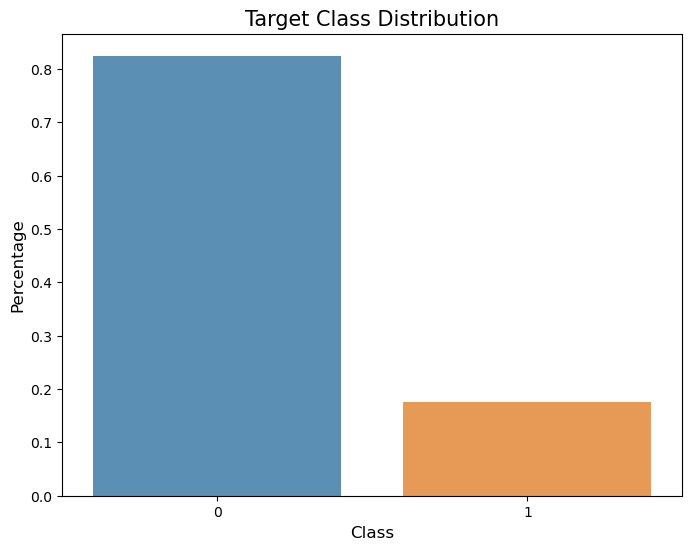

In [10]:
distribution = train["Class"].value_counts()/len(train)
display(distribution)
#create a bar plot for the target variable
plt.figure(figsize=(8,6))
sns.barplot(x=distribution.index, y=distribution.values, alpha=0.8)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title("Target Class Distribution", fontsize=15)
plt.show()

We can see that data imbalance is present in the dataset. We will have to deal with this later.

## Missing Values

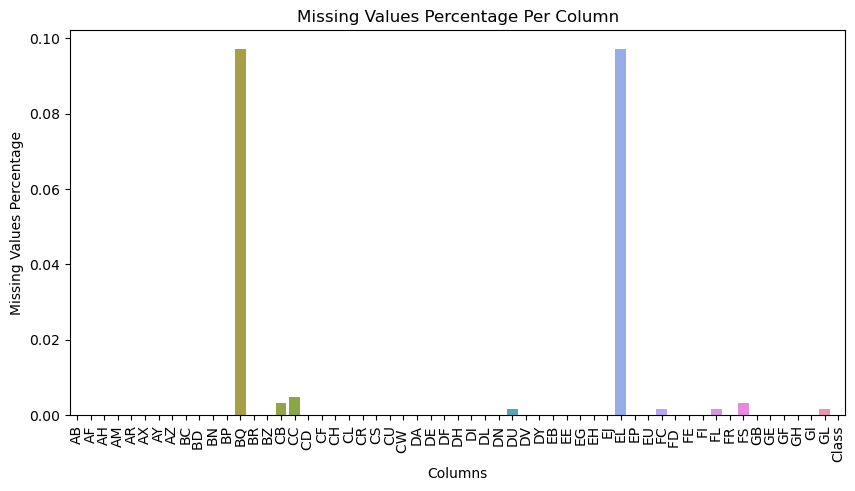

In [11]:
missing_values = train.isna().sum()/len(train)
#create a line plot to show the missing values
plt.figure(figsize=(10,5))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)
plt.title("Missing Values Percentage Per Column")
plt.ylabel("Missing Values Percentage")
plt.xlabel("Columns")
plt.show()

The columns `BQ` and `EL` has about 10% missing values. Others have very little, if any, missing values. We will see later how to deal with this.

# Visualizations

## Correlation Matrix

We will start by visualizing the correlation between different features.

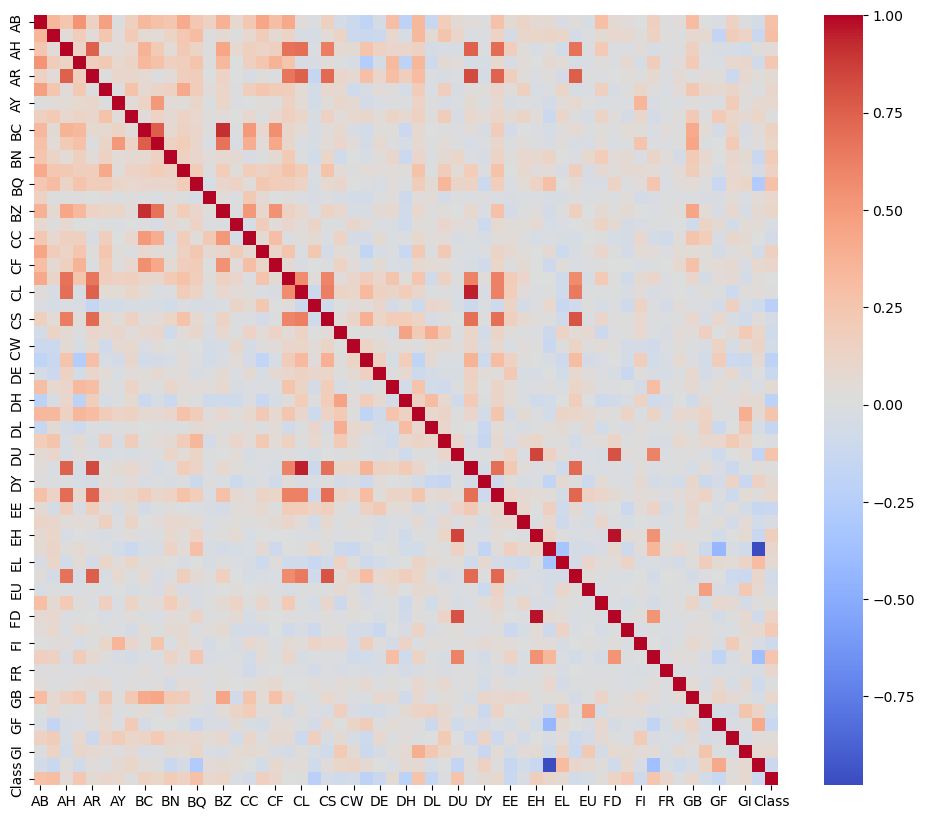

In [12]:
# create a heatmap to visualize the correlation
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=False, cmap="coolwarm")
plt.show()

We can see that some columns are highly correlated with each other. Let's see how the features are correlated with the target variable.

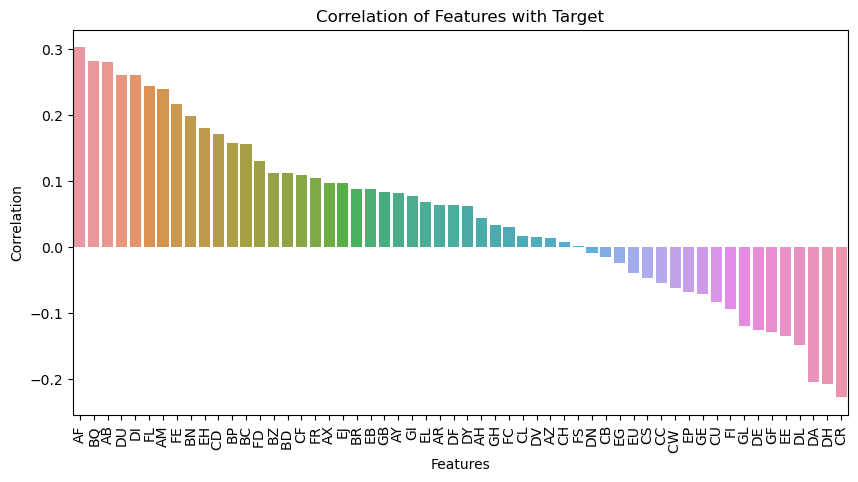

In [13]:
corr = train.corr()
corr_target = corr["Class"].sort_values(ascending=False)[1:]

# create a bar plot to visualize the correlation
plt.figure(figsize=(10,5))
sns.barplot(x=corr_target.index, y=corr_target.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Target")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.show()

## Distribution of Features

Next, we will consider the distribution of individual features.

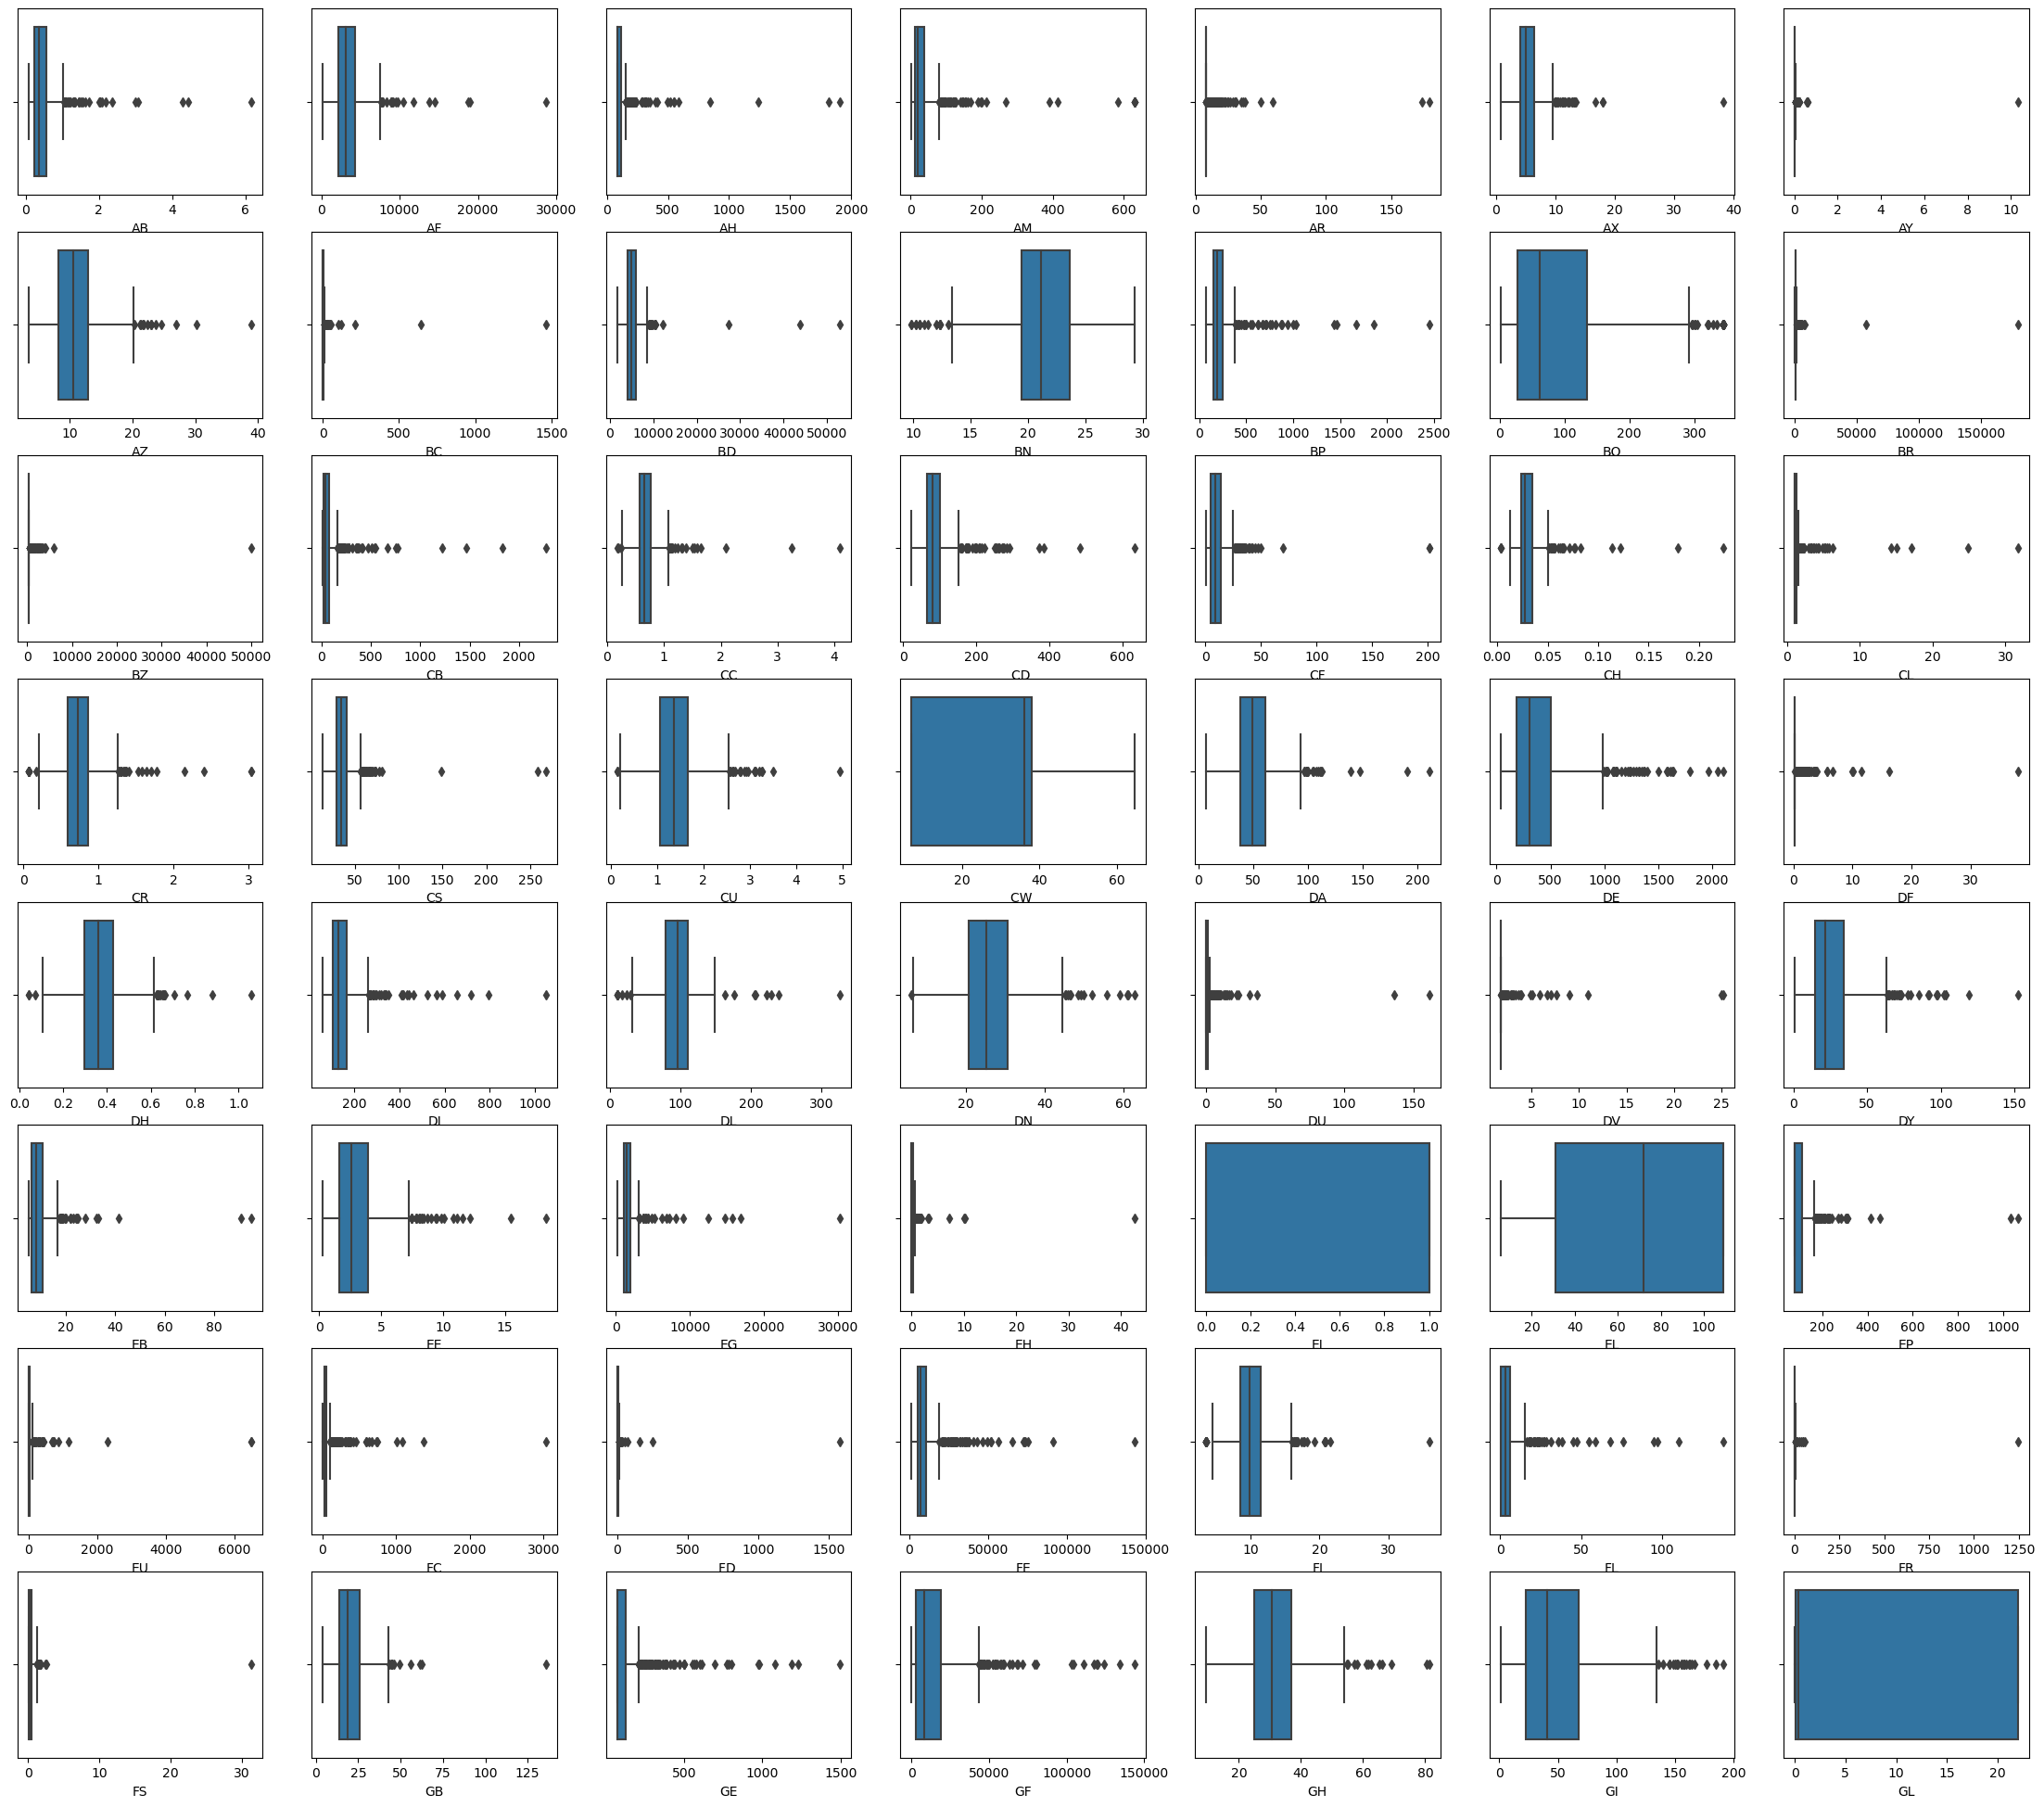

In [14]:
columns = train.columns
columns = columns.drop(["Class"])

# create a box plot to visualize the distribution of the features
rows = 8
cols = len(columns)//rows

plt.figure(figsize=(3.5*rows,3.5*cols))
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data = train, x = column)
    plt.xlabel(column)

Let's create a histogram with kde for each feature.

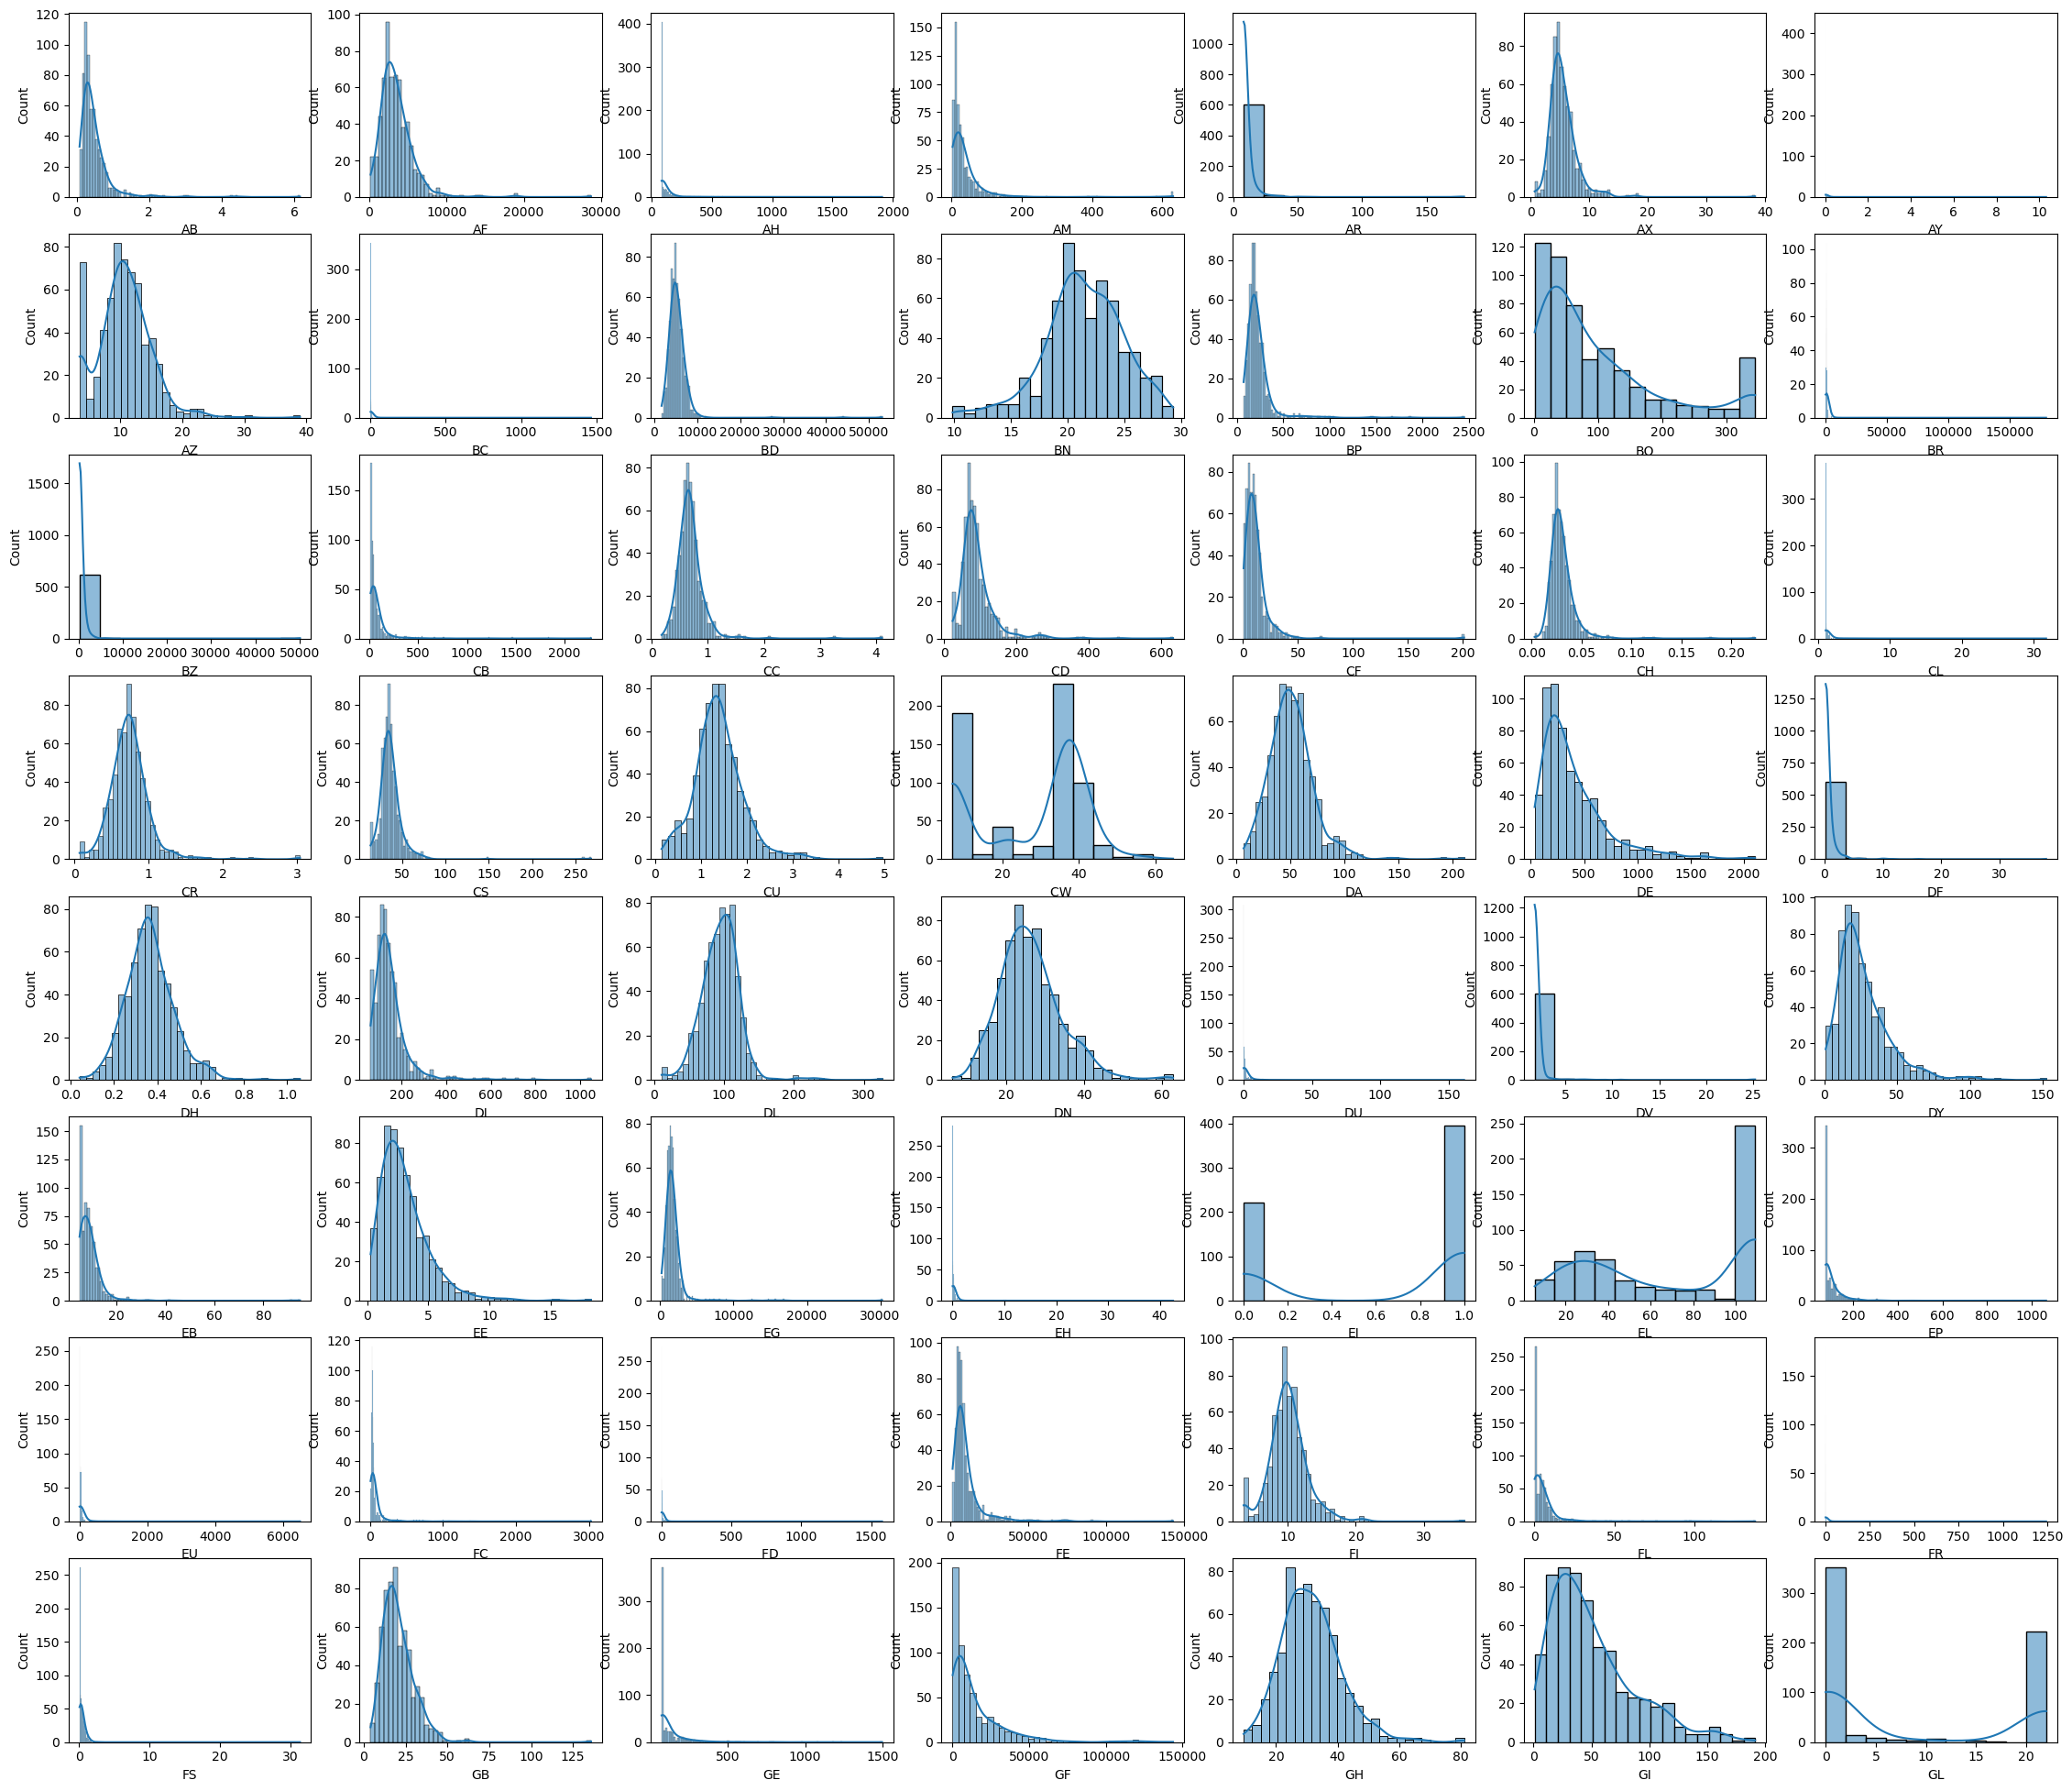

In [15]:
# create a historgram with kde plot to visualize the distribution of the features
rows = 8
cols = len(columns)//rows

plt.figure(figsize=(3.5*rows,3.5*cols))
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(train[column], kde=True)
    plt.xlabel(column)

There are some observations:

1. Data is not normally distributed for most features.
2. Some features have a lot of outliers.
3. Some features are bimodal.
4. The value of individual features varies a lot.

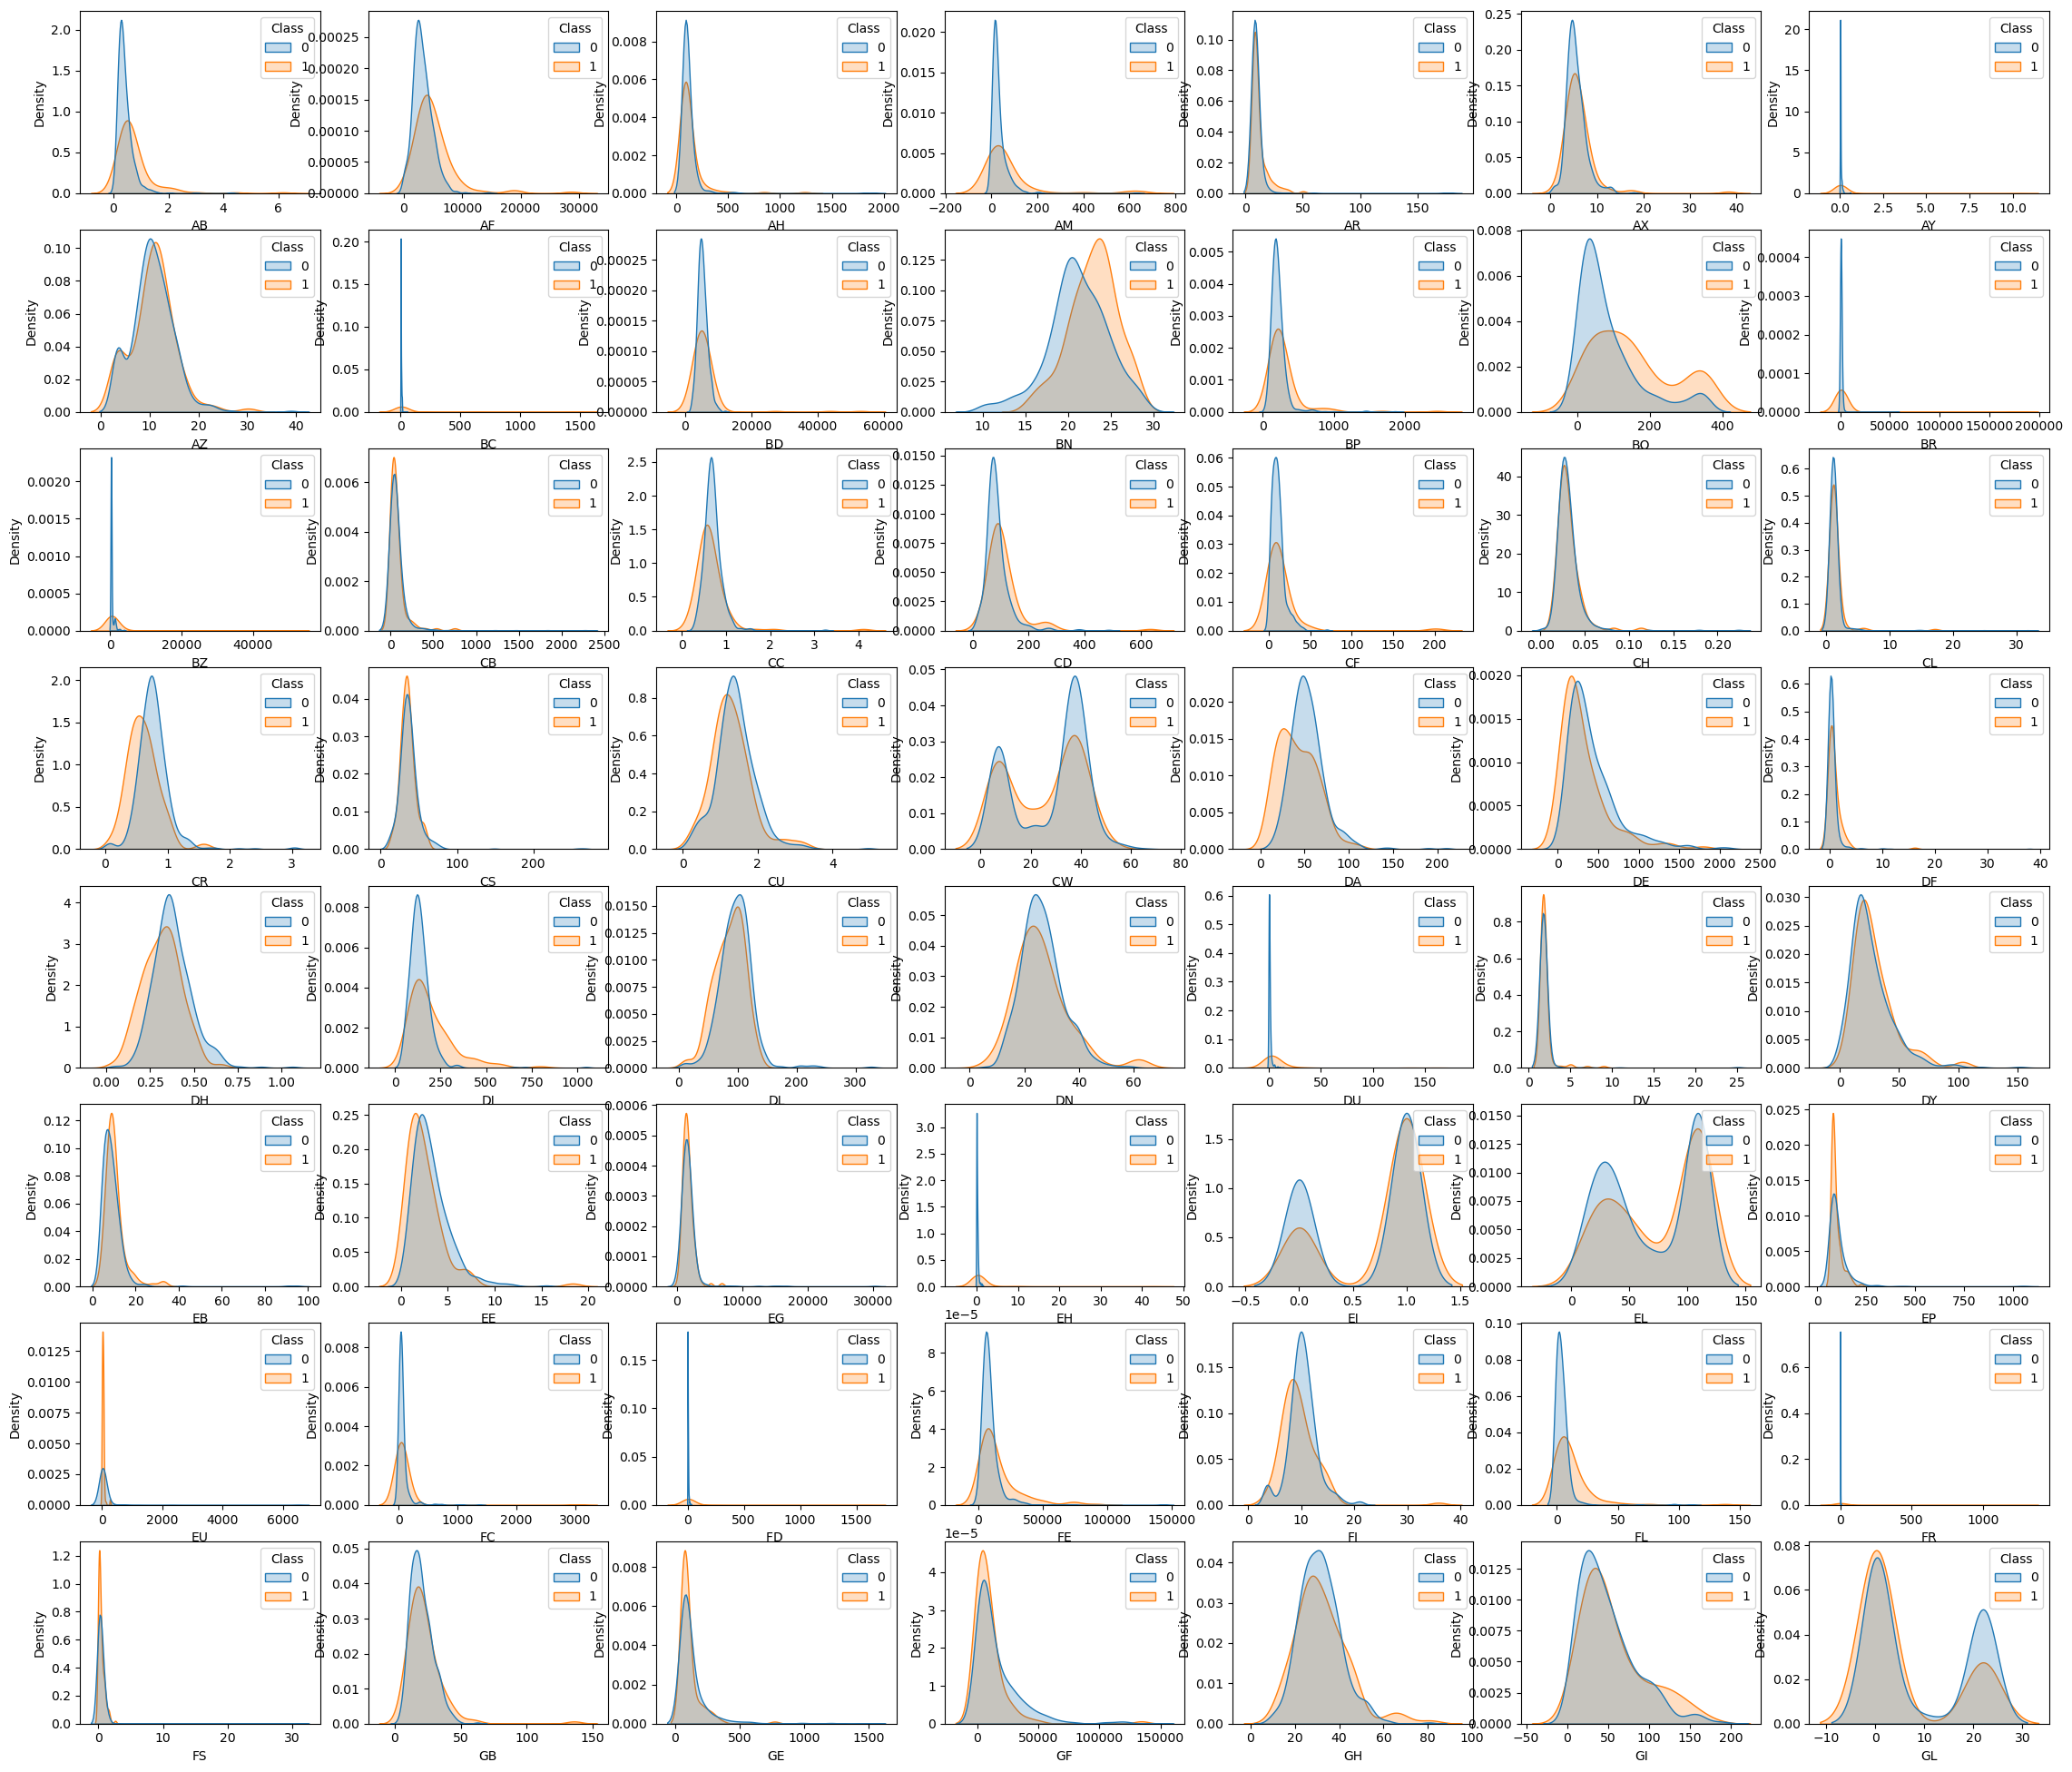

In [16]:
rows = 8
cols = len(columns)//rows

plt.figure(figsize=(3.5*rows,3.5*cols))
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(data = train, x = column, hue="Class", fill=True, common_norm=False)
    plt.xlabel(column)

We can see that for a lot of features, the distribution is almost the same for both classes. This means that these features are not very useful for classification. Furthermore, a lot of features does not have a normal distribution. Some of them have bimodal distribution.

# Imputing Missing Values

We will impute missing values using `sklearn.impute.KNNImputer` or `sklearn.impute.SimpleImputer` depending on the number of missing values in the column.

In [17]:
train_null_columns = list(train.columns[train.isna().sum() != 0])
test_null_columns = list(test.columns[test.isna().sum() != 0])

In [18]:
train_null_columns, test_null_columns

(['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL'], [])

> The test dataset given here is just a placeholder. Which means that the test dataset will be different when the model is evaluated. So, while doing preprocessing, we will write general code that can be used for any test dataset.

## Strategy

The strategy for imputing missing values is as follows:

1. If the number of missing values in the given column is less than or equal to a threshold `thresh`, we will use mean imputation.
2. Otherwise, we will use KNN imputation.

In [19]:
train[train_null_columns].isna().sum()

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64

In [20]:
thresh = 2
train_columns_to_fill_via_mean = []
train_columns_to_fill_via_knn = []

null_count = train[train_null_columns].isna().sum()
for column in train_null_columns:
    if null_count[column] <= thresh:
        train_columns_to_fill_via_mean.append(column)
    else:
        train_columns_to_fill_via_knn.append(column)

train_columns_to_fill_via_mean, train_columns_to_fill_via_knn

(['CB', 'DU', 'FC', 'FL', 'FS', 'GL'], ['BQ', 'CC', 'EL'])

In [21]:
thresh = 2
test_columns_to_fill_via_mean = []
test_columns_to_fill_via_knn = []

null_count = test[test_null_columns].isna().sum()
for column in test_null_columns:
    if null_count[column] <= thresh:
        test_columns_to_fill_via_mean.append(column)
    else:
        test_columns_to_fill_via_knn.append(column)

test_columns_to_fill_via_mean, test_columns_to_fill_via_knn

([], [])

Great! We will write a pipeline for this.

## Imputer Pipeline

In [22]:
simple_imputer = SimpleImputer(strategy="mean")
knn_imputer = KNNImputer(n_neighbors=5)

train_imputer = ColumnTransformer(
    [
        ("mean_imputer", simple_imputer, train_columns_to_fill_via_mean),
        ("knn_imputer", knn_imputer, train_columns_to_fill_via_knn),
    ],
)

test_imputer = ColumnTransformer(
    [
        ("mean_imputer", simple_imputer, test_columns_to_fill_via_mean),
        ("knn_imputer", knn_imputer, test_columns_to_fill_via_knn),
    ],
)

In [23]:
train_c = train.copy()
test_c = test.copy()

In [24]:
train_final_columns = train_columns_to_fill_via_mean + train_columns_to_fill_via_knn
test_final_columns = test_columns_to_fill_via_mean + test_columns_to_fill_via_knn

In [25]:
train_c[train_final_columns] = train_imputer.fit_transform(train_c)
test_c[test_final_columns] = test_imputer.fit_transform(test_c)


In [26]:
train_c.isna().sum().sum(), test_c.isna().sum().sum()

(0, 0)

Let's have a look at the final distribution of features after imputation.

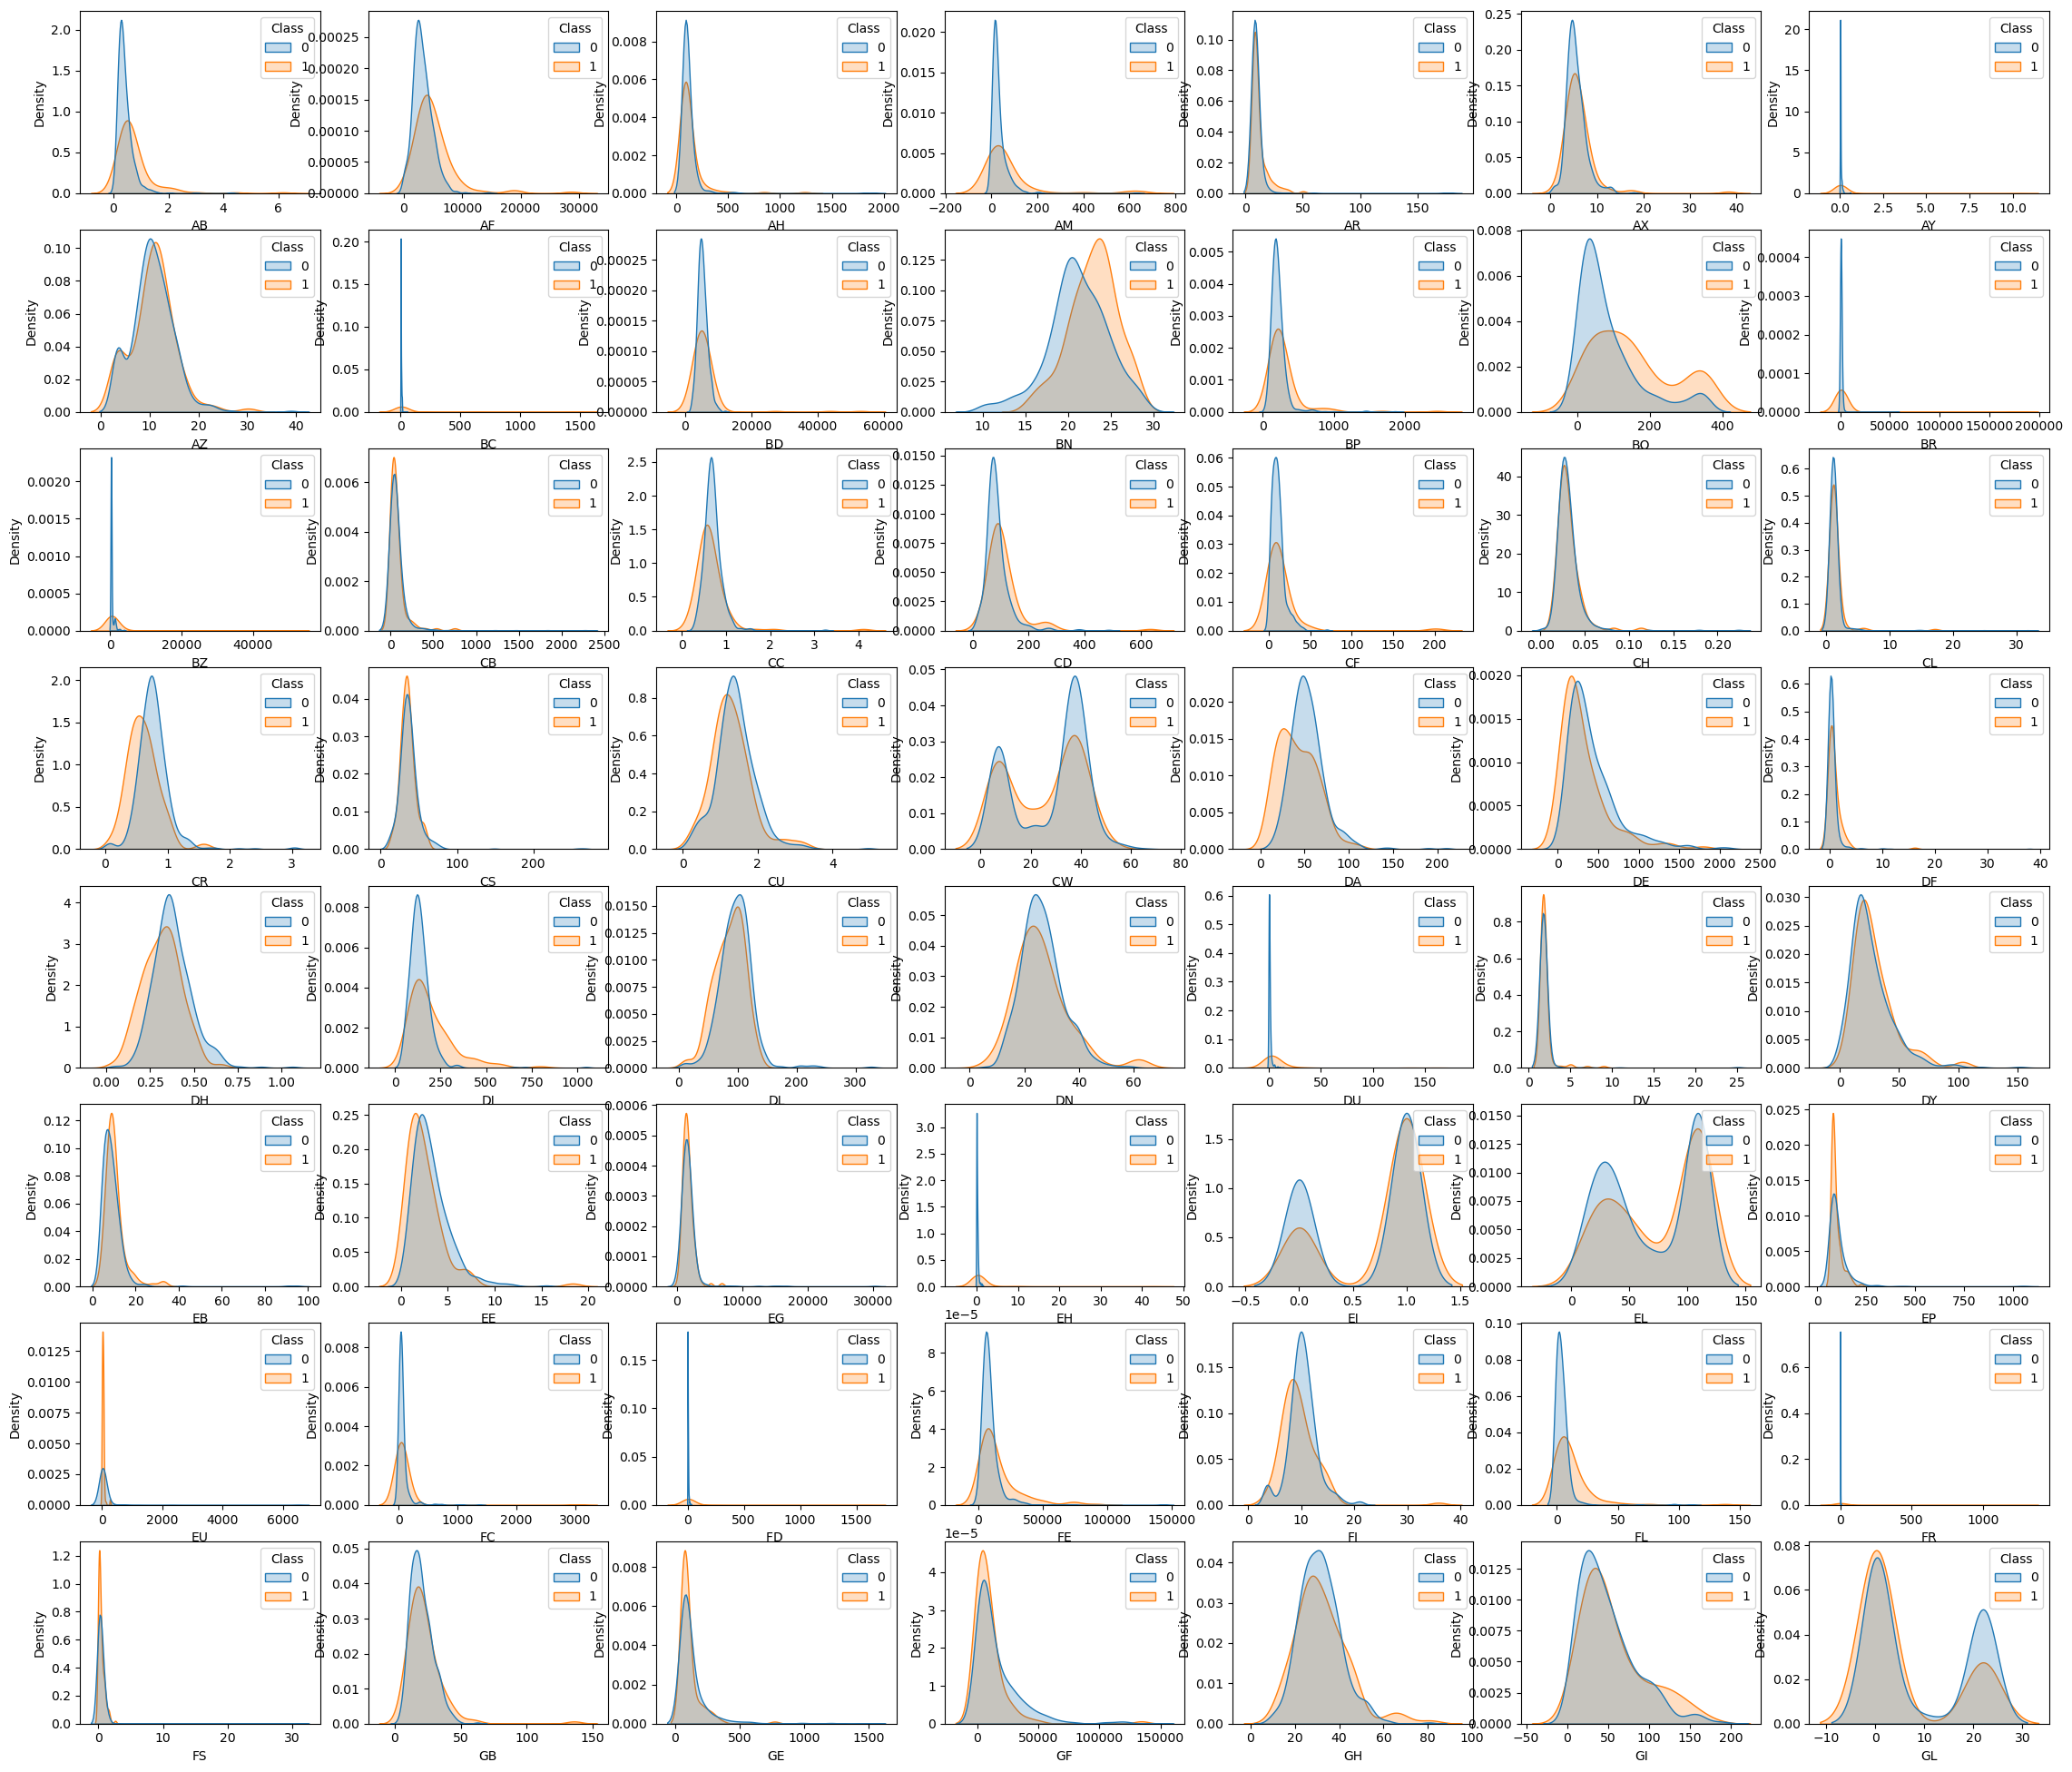

In [27]:
rows = 8
cols = len(columns)//rows

plt.figure(figsize=(3.5*rows,3.5*cols))
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(data = train, x = column, hue="Class", fill=True, common_norm=False)
    plt.xlabel(column)

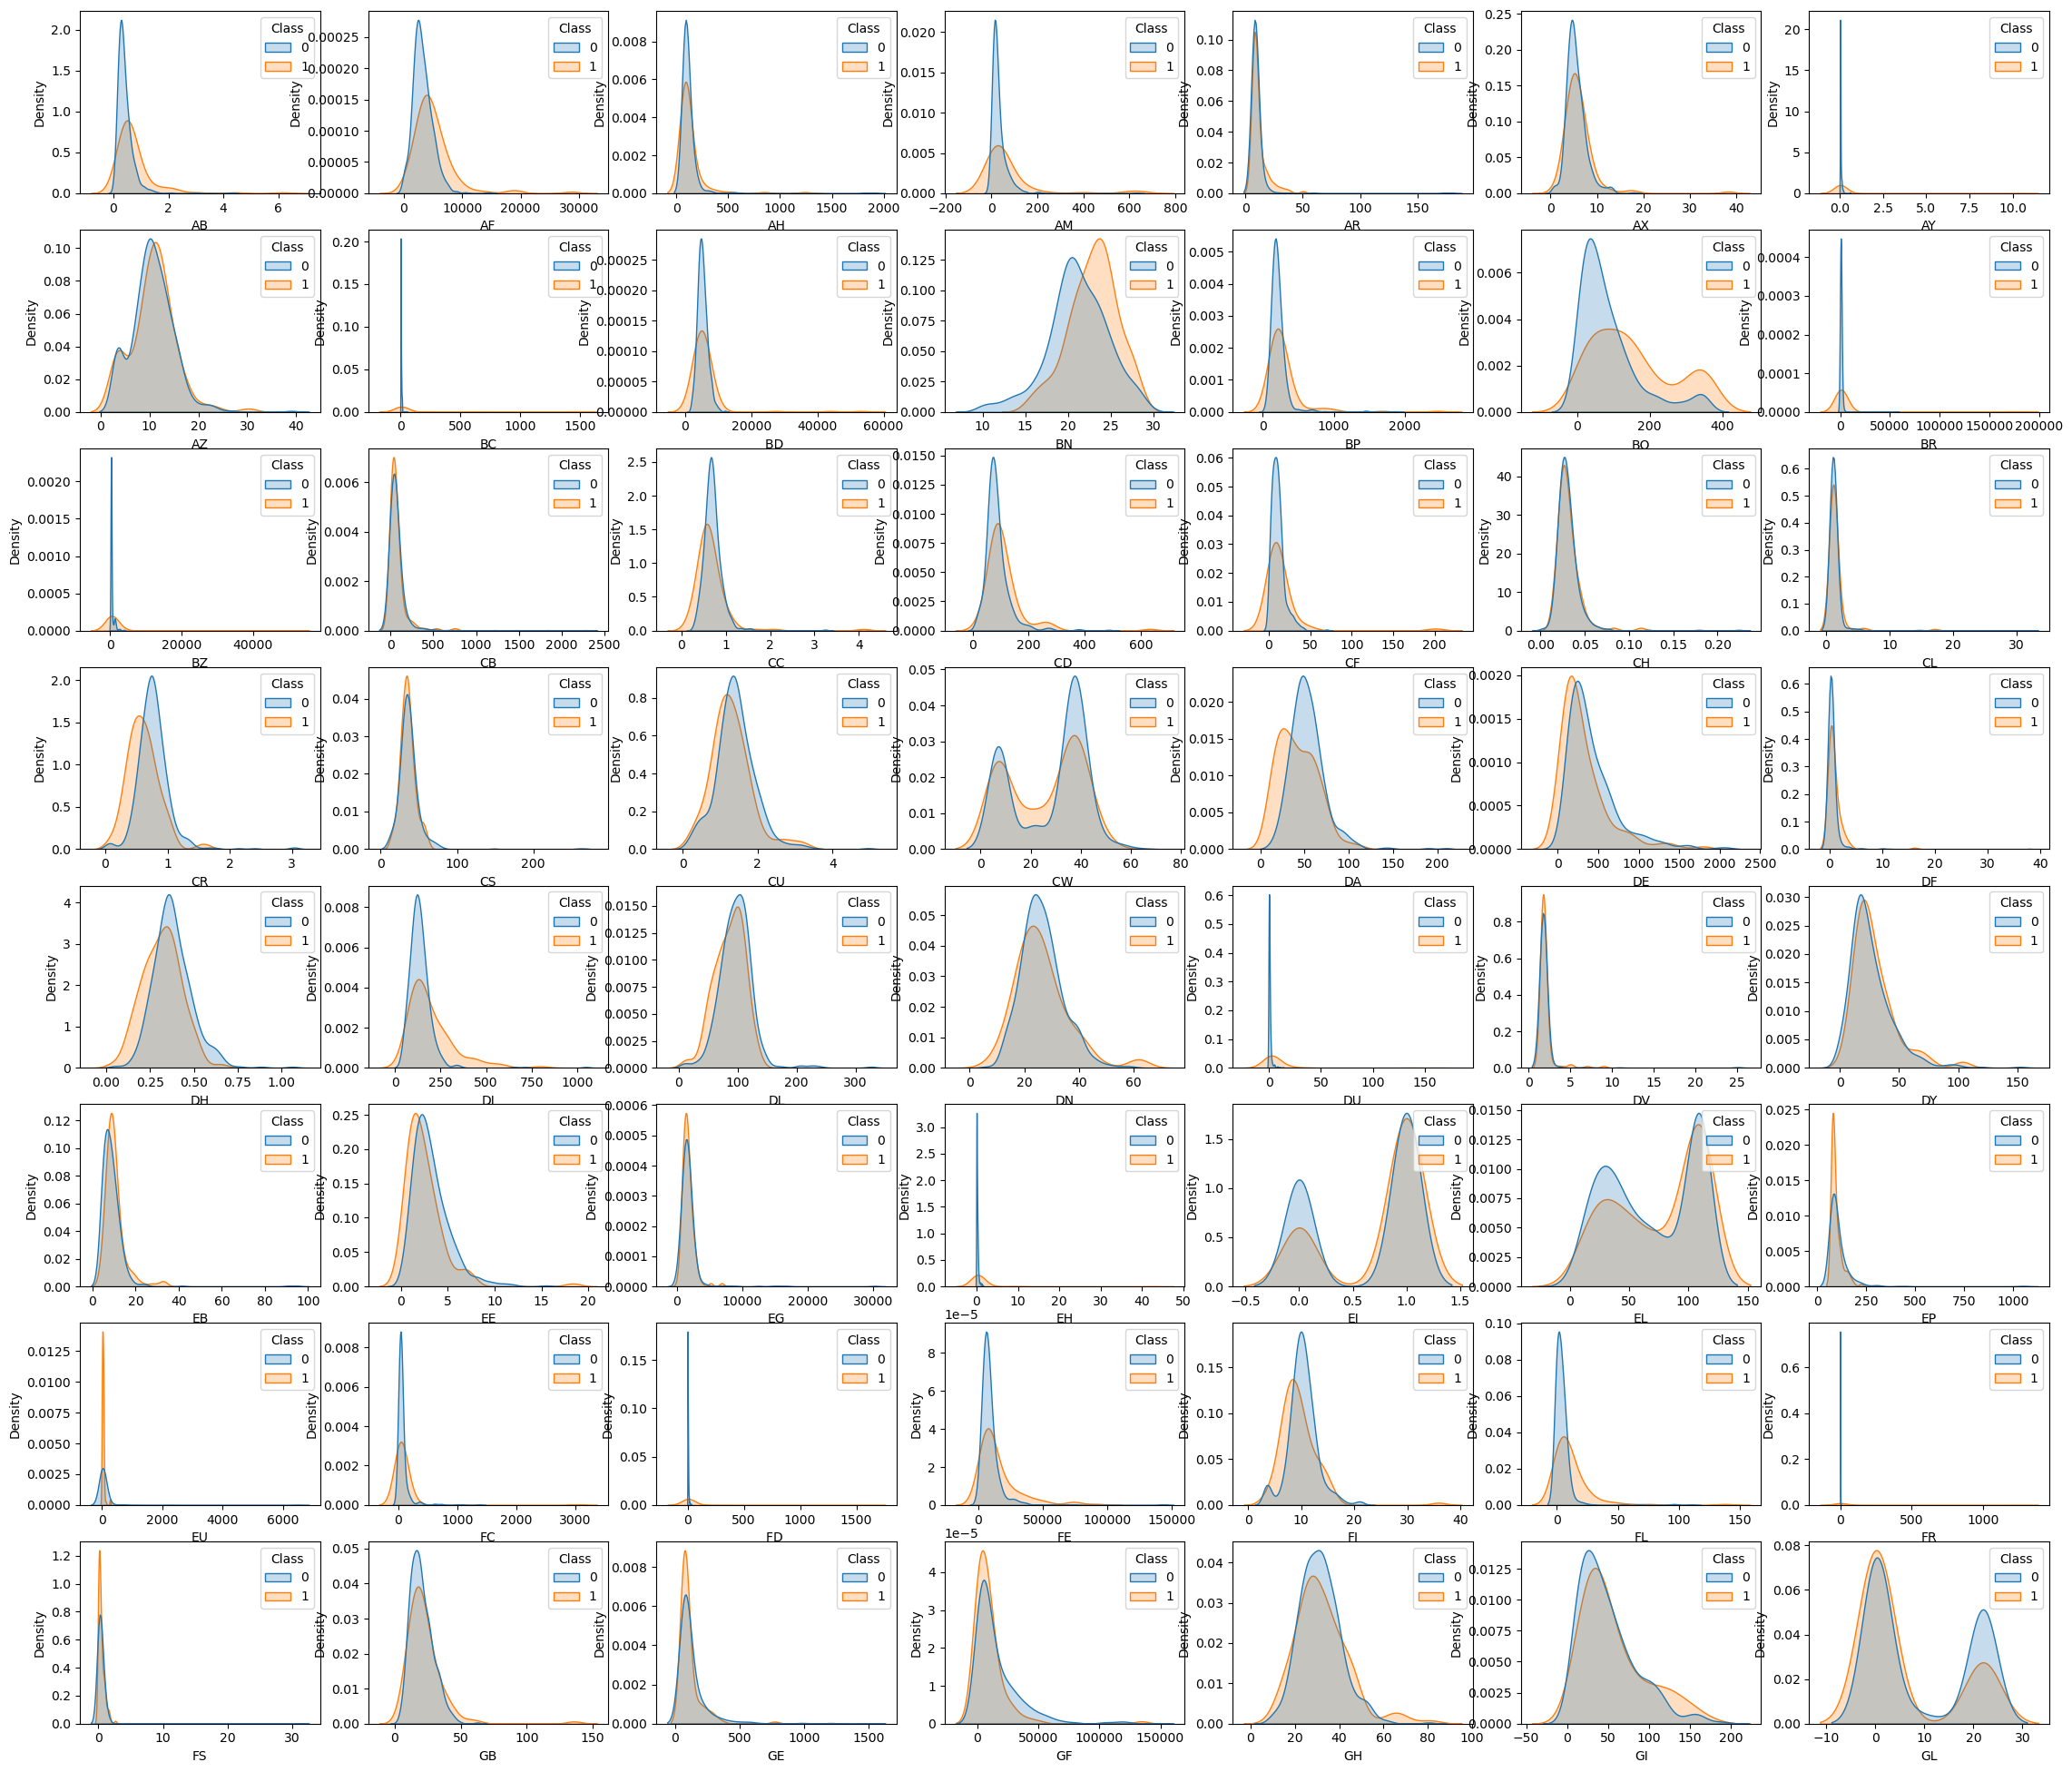

In [28]:
rows = 8
cols = len(columns)//rows

plt.figure(figsize=(3.5*rows,3.5*cols))
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(data = train_c, x = column, hue="Class", fill=True, common_norm=False)
    plt.xlabel(column)

If we look at the distribution of `BQ` and `EL`, we will see that the distribution is changed very little after the transformation. This is a good thing. This means that the imputation is not changing the distribution of the data.

# Scaling and Normalization

The final step will be to scale and normalize the data. We will use `sklearn.preprocessing.StandardScaler` for this. We will also use `sklearn.preprocessing.PowerTransformer` to transform the data to a normal distribution.

In [29]:
standard_scaler = StandardScaler()
power_transformer = PowerTransformer(method="yeo-johnson")

scaling_pipe = Pipeline([
    ("standard_scaler", standard_scaler),
    ("power_transformer", power_transformer)
])

train_c[columns] = scaling_pipe.fit_transform(train_c[columns])
test_c[columns] = scaling_pipe.fit_transform(test_c[columns])

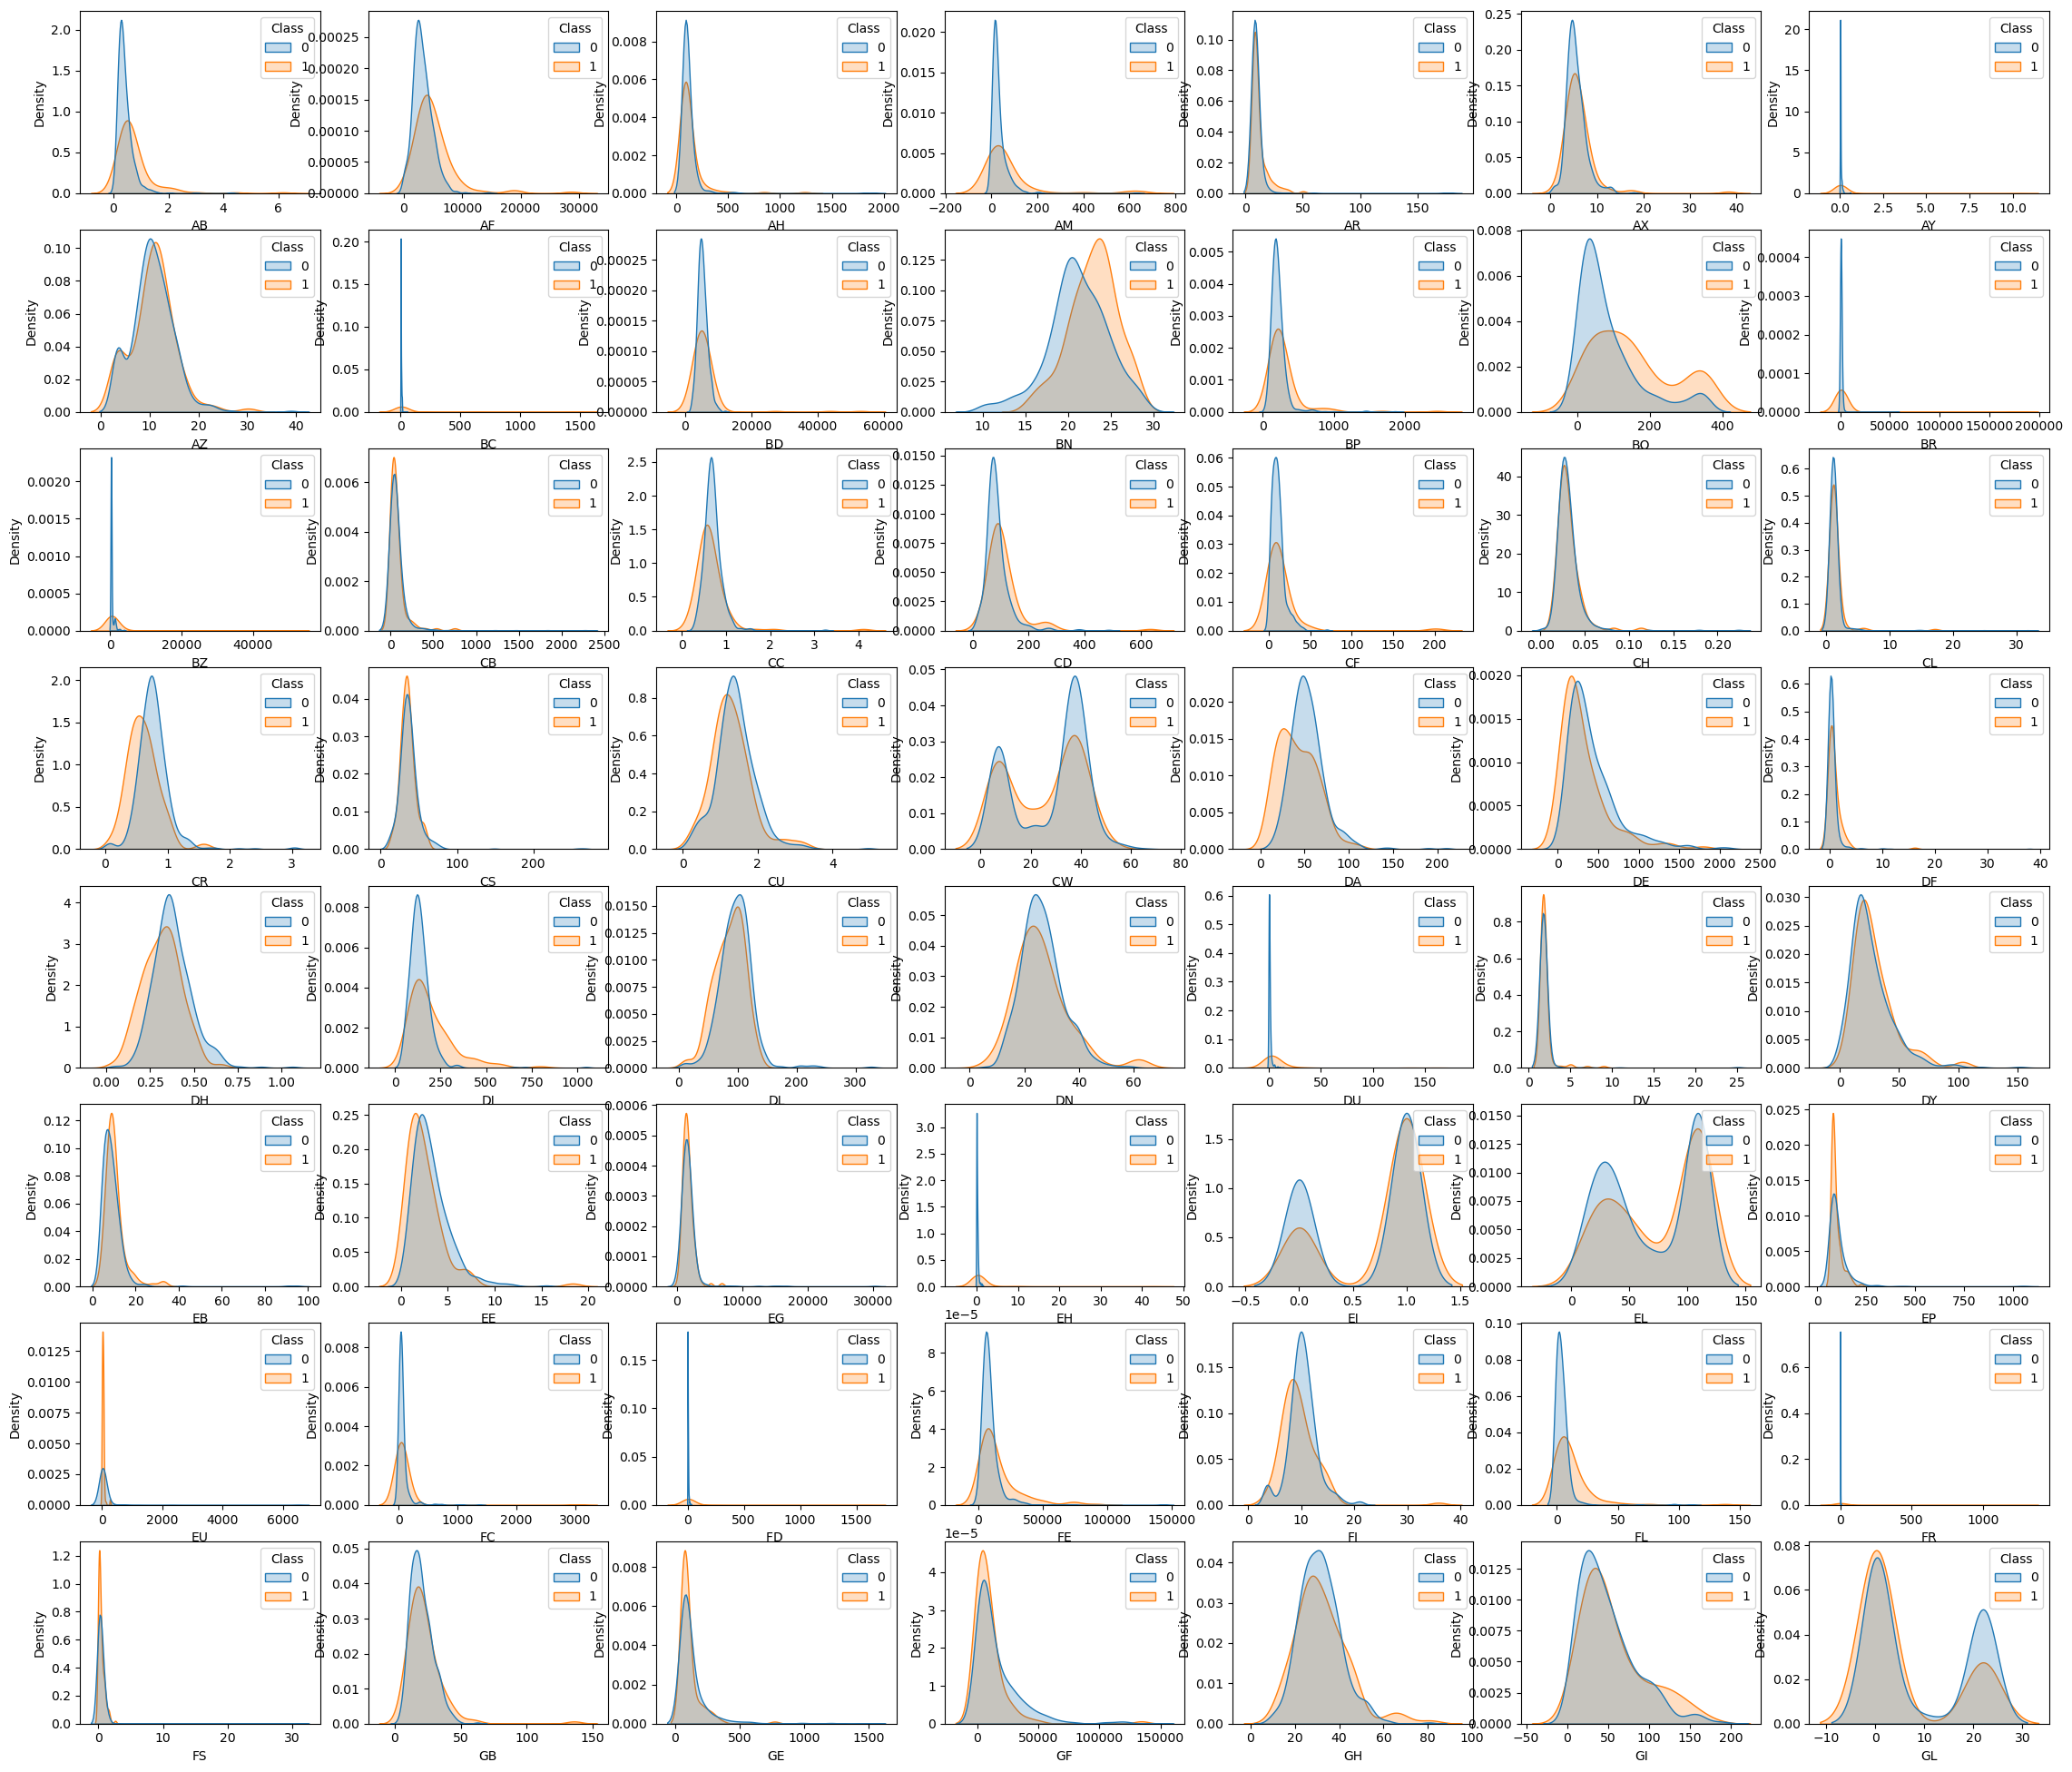

In [30]:
rows = 8
cols = len(columns)//rows

plt.figure(figsize=(3.5*rows,3.5*cols))
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(data = train, x = column, hue="Class", fill=True, common_norm=False)
    plt.xlabel(column)

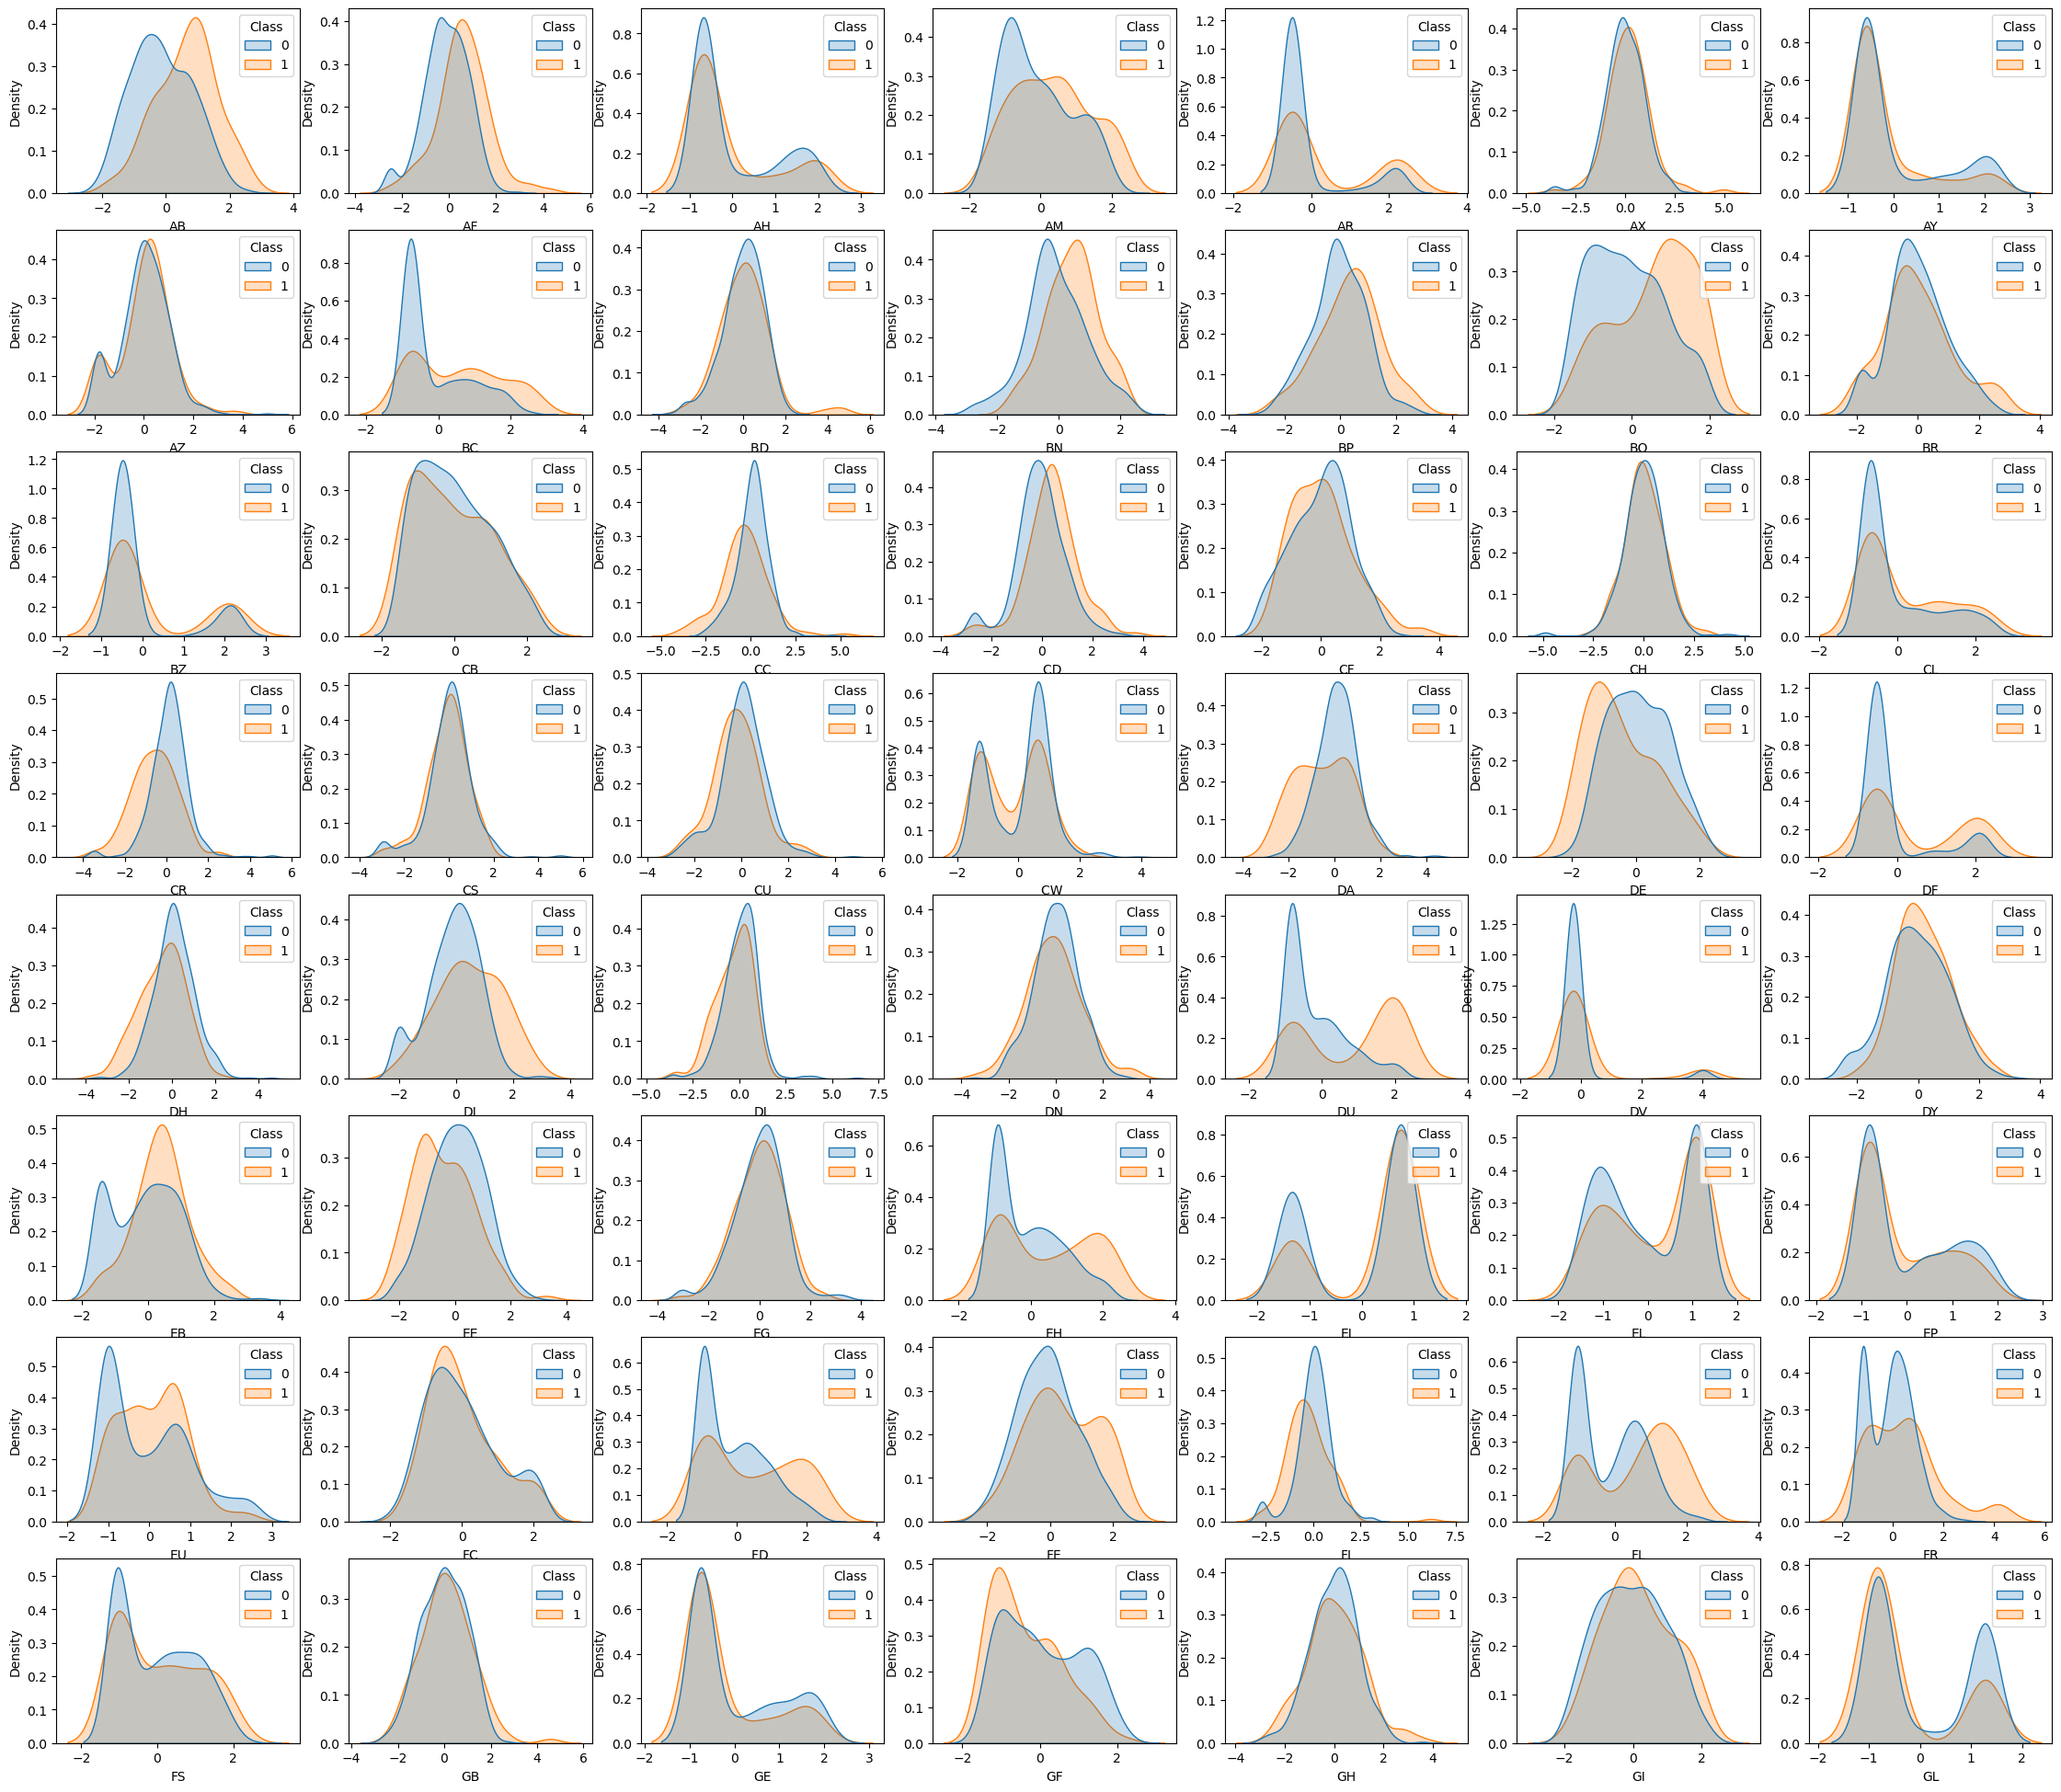

In [31]:
rows = 8
cols = len(columns)//rows

plt.figure(figsize=(3.5*rows,3.5*cols))
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(data = train_c, x = column, hue="Class", fill=True, common_norm=False)
    plt.xlabel(column)

After these transformations, the data is ready for training.